In [8]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization.Interval2d import Interval2d
from interClusLib.visualization.Interval3d import Interval3d
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         12.136909        51.414475        37.948474        51.190193   
1          9.457843        16.574199        25.746006        32.181753   
2         11.077496        32.443367        80.180454        97.852059   
3         19.114822        83.774419        60.721195        82.147611   
4          0.194614        30.748330         9.044278        27.347681   
5         26.961715        89.854422         9.936954        96.249399   
6         39.346120        64.251302        41.613463        85.495535   
7          0.568856        98.739332        20.852943        71.194577   
8         47.857798        92.707355        26.939355        59.591000   
9         67.064293        67.974857        51.659072        87.620877   
10        59.016570        78.539198        49.299044        79.494

In [9]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.00000000e+00 3.52529912e-02 1.67806805e-01 1.50292088e-01
  1.21121124e-01 1.56017508e-01 2.72064419e-01 2.21044213e-01
  1.49896311e-01 0.00000000e+00 1.51731789e-02 1.67896799e-01
  2.17954313e-01 1.74065654e-01 3.51002568e-01 4.07270531e-01
  1.82929269e-01 0.00000000e+00 1.41830102e-01 1.98375393e-01
  3.09494779e-01 8.51028371e-02 1.77113362e-01 1.49400353e-01
  7.18636829e-02 2.49519353e-01 2.60846399e-01 2.49991907e-02
  1.69084016e-01 1.49324596e-01]
 [3.52529912e-02 1.00000000e+00 7.97125284e-02 0.00000000e+00
  1.00712394e-01 4.19269966e-02 0.00000000e+00 8.24843416e-02
  5.16314528e-02 0.00000000e+00 3.65549359e-03 2.42825933e-01
  3.12397841e-02 5.61859728e-02 9.68263099e-02 5.04903210e-02
  2.62629912e-02 1.82489471e-01 7.04614056e-02 5.52438241e-03
  4.77655556e-03 2.85349869e-03 2.83297085e-04 0.00000000e+00
  3.11424707e-02 4.28877450e-02 3.21344077e-02 2.91894030e-01
  4.64307738e-03 4.74915660e-02]
 [1.67806805e-01 7.97125284e-02 1.00000000e+00 1.71679922e-01
 

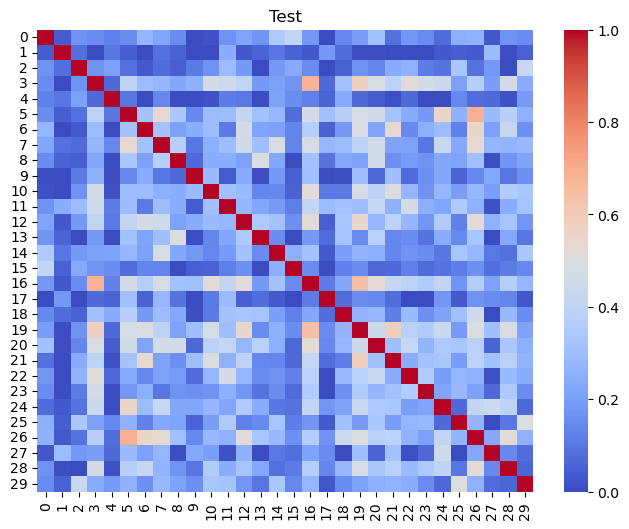

In [10]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [11]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[1 1 2 2 1 1 1 1 3 2 2 2 1 3 2 0 2 3 3 2 2 2 2 2 2 2 1 0 2 2]


<Figure size 1000x600 with 0 Axes>

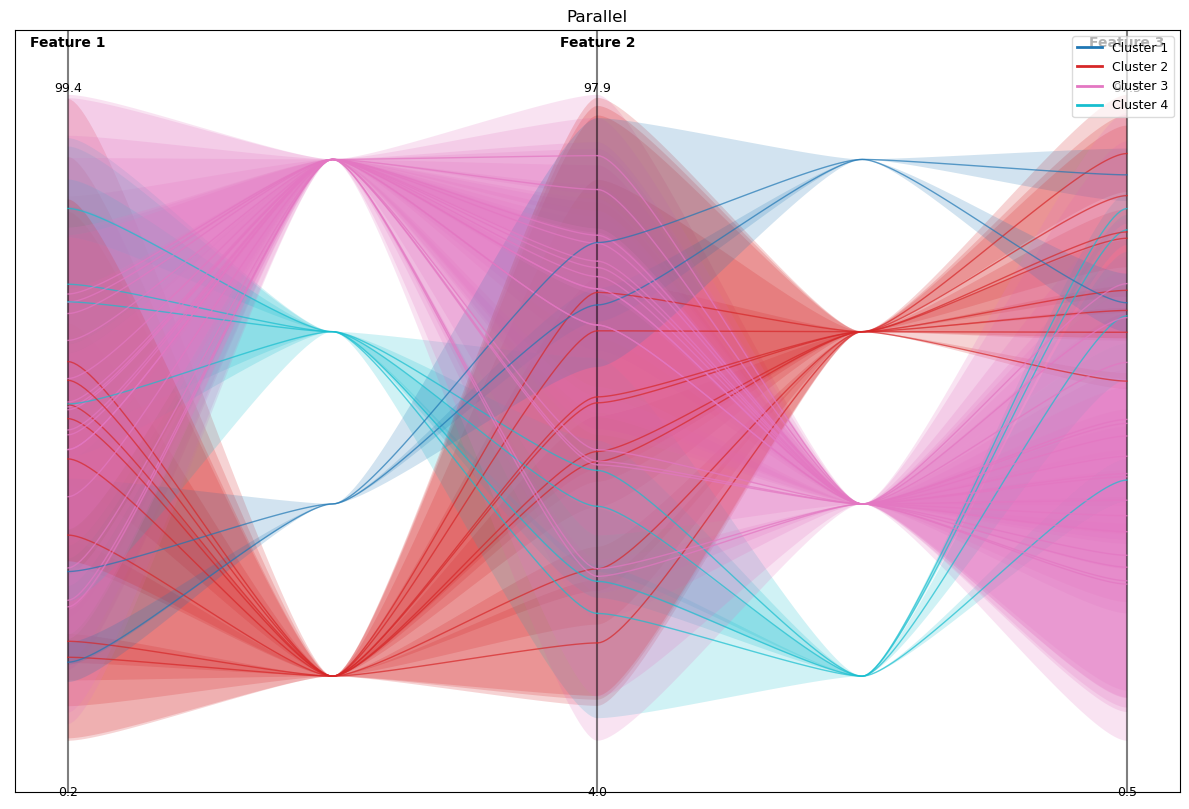

In [12]:
plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.labels_, beta = 1)
plt.title("Parallel")
plt.show()

In [13]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    Interval3d.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    Interval2d.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    Interval2d.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


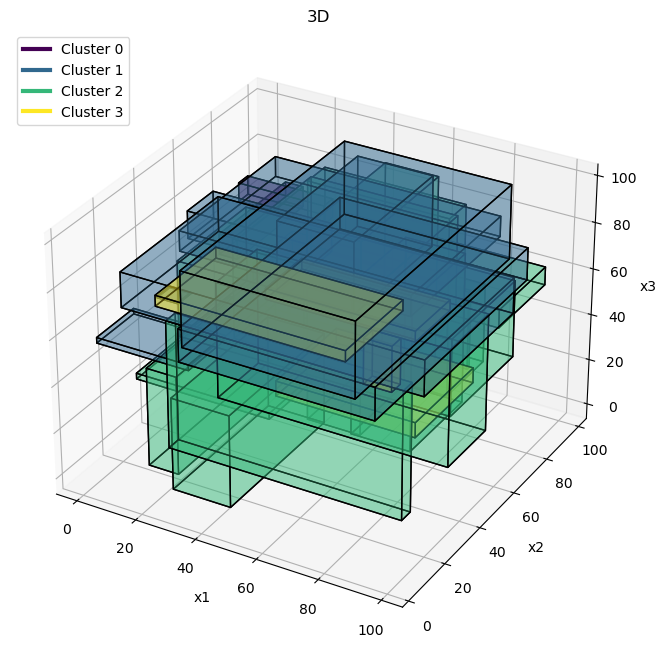

In [14]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         12.136909        51.414475        37.948474        51.190193   
1          9.457843        16.574199        25.746006        32.181753   
2         11.077496        32.443367        80.180454        97.852059   
3         19.114822        83.774419        60.721195        82.147611   
4          0.194614        30.748330         9.044278        27.347681   
5         26.961715        89.854422         9.936954        96.249399   
6         39.346120        64.251302        41.613463        85.495535   
7          0.568856        98.739332        20.852943        71.194577   
8         47.857798        92.707355        26.939355        59.591000   
9         67.064293        67.974857        51.659072        87.620877   
10        59.016570        78.539198        49.299044        79.494352   
11        12.364816        89.664016        25.427734        30.311695   
12         5.5

ValueError: Unsupported intervals shape: (30, 3, 2). Expected (n_samples, 1, 2) or similar.

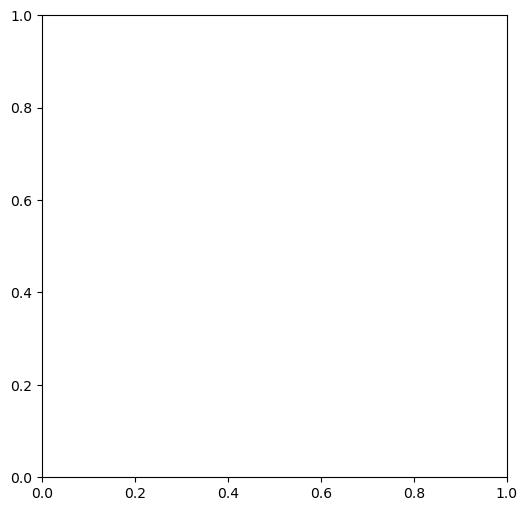

In [15]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)


model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0         37.642104        47.518800        87.975492        99.070772
1          6.140079        94.234274        10.885616        21.354939
2         28.380370        44.718896        46.601996        82.180924
3         90.525302        91.957251        19.278583        23.025270
4         56.695422        91.691875         1.293859        21.227392
5         56.871391        72.239912        30.342035        82.093461
6         16.176878        69.212786        15.967656        76.709316
7         52.407264        64.192542        87.604533        97.875313
8          1.845676        37.227472        36.046490        81.046227
9         21.869767        56.979685        43.415136        46.013033
10        59.667923        72.308174        74.728029        97.363108
11        20.397126        49.974187         5.115288        39.130665
12        87.310496        95.789061        43.708572

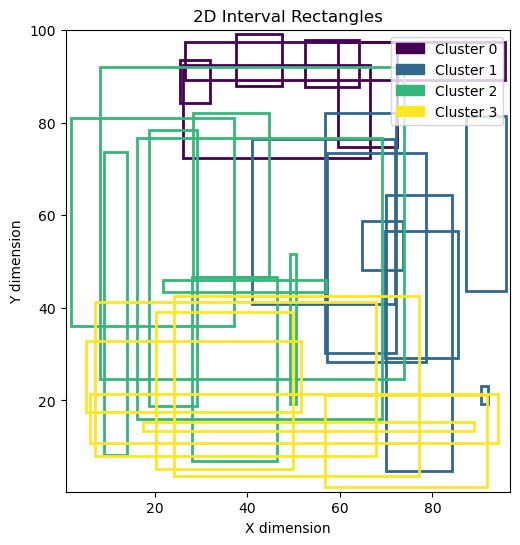

In [ ]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)